# Challenge: Feedback Analysis

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a [nice labeled dataset of sentiment](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) labelled sentences for us to use. This dataset was created for the paper. [From Group to Individual Labels using Deep Features](http://mdenil.com/media/papers/2015-deep-multi-instance-learning.pdf), Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another. Include your model and a brief writeup of your feature engineering and selection process.

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data_path = ("https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/imdb_labelled.txt")
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['statement', 'positive']

In [33]:
sms_raw.head(3)

,statement,positive
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0


We remove the casing and punctuation from our statement feature, as we don't believe that it will affect the prediction of whether a statement has a positive or negative sentiment.

In [0]:
sms_raw['statement'] = sms_raw['statement'].str.lower()

In [47]:
sms_raw['positive'].unique()

array([0, 1])

In [48]:
sms_raw['statement'].head(3)

0    a very, very, very slow-moving, aimless movie ...
1    not sure who was more lost - the flat characte...
2    attempting artiness with black & white and cle...
Name: statement, dtype: object

In [49]:
sms_raw.shape[0]

748

The dataset is well balanced, with a ~2% difference in the number of negative vs positive comments.

In [50]:
percentageOfPositiveComments = (sms_raw['positive'].sum() / sms_raw.shape[0]) * 100
print("The percentage of ṕositive comments is " + str(percentageOfPositiveComments) )

The percentage of ṕositive comments is 51.60427807486631


We use a simple group of keywords to identify positive statements and compare to the actual percentage of positive comments known above.

In [0]:
keywords = ['best', 'good', 'great', 'exciting', 'excellent', 'awesome', 'cool', 'amazing', 'well', 'better', 'memorable', 'unforgettable', 'moving']

for key in keywords:

    sms_raw[str(key)] = sms_raw.statement.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

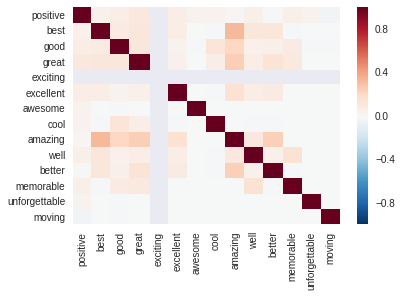

In [41]:
sns.heatmap(sms_raw.corr())

In [0]:
data = sms_raw[keywords]
target = sms_raw['positive']

In [54]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 331
